In [1]:
import rioxarray

In [2]:
import pystac

In [3]:
items = pystac.ItemCollection.from_file("search.json")

In [4]:
items 

ID: S2A_31UFU_20200328_0_L2A
"Bounding Box: [4.814996623122647, 52.22257539160586, 6.1417542968794585, 53.228577890548]"
Datetime: 2020-03-28 10:46:21+00:00
datetime: 2020-03-28T10:46:21Z
platform: sentinel-2a
constellation: sentinel-2
instruments: ['msi']
gsd: 10
view:off_nadir: 0
proj:epsg: 32631
sentinel:utm_zone: 31


In [5]:
href = items[0].assets["B09"].get_absolute_href()

In [6]:
href

'https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/31/U/FU/2020/3/S2A_31UFU_20200328_0_L2A/B09.tif'

In [7]:
raster_ams_b9 = rioxarray.open_rasterio(href)

In [8]:
raster_ams_b9

<xarray.DataArray (band: 1, y: 1830, x: 1830)>
[3348900 values with dtype=uint16]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 6e+05 6.001e+05 6.002e+05 ... 7.097e+05 7.098e+05
  * y            (y) float64 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

In [10]:
raster_ams_b9.rio.crs  # Coordinate reference system

CRS.from_epsg(32631)

In [11]:
raster_ams_b9.rio.nodata  # value to encode missing value

0

In [12]:
raster_ams_b9.rio.bounds()  # bbox 

(600000.0, 5790240.0, 709800.0, 5900040.0)

In [13]:
raster_ams_b9.values

array([[[    0,     0,     0, ...,  8888,  9075,  8139],
        [    0,     0,     0, ..., 10444, 10358,  8669],
        [    0,     0,     0, ..., 10346, 10659,  9168],
        ...,
        [    0,     0,     0, ...,  4295,  4289,  4320],
        [    0,     0,     0, ...,  4291,  4269,  4179],
        [    0,     0,     0, ...,  3944,  3503,  3862]]], dtype=uint16)

In [14]:
raster_ams_b9.values

array([[[    0,     0,     0, ...,  8888,  9075,  8139],
        [    0,     0,     0, ..., 10444, 10358,  8669],
        [    0,     0,     0, ..., 10346, 10659,  9168],
        ...,
        [    0,     0,     0, ...,  4295,  4289,  4320],
        [    0,     0,     0, ...,  4291,  4269,  4179],
        [    0,     0,     0, ...,  3944,  3503,  3862]]], dtype=uint16)

In [16]:
type(raster_ams_b9.values)

numpy.ndarray

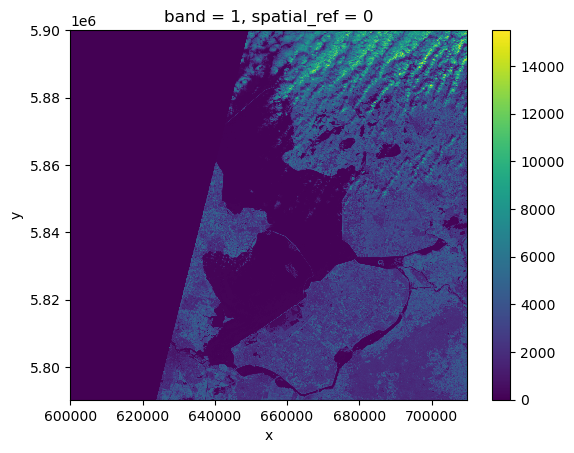

In [17]:
raster_ams_b9.plot()

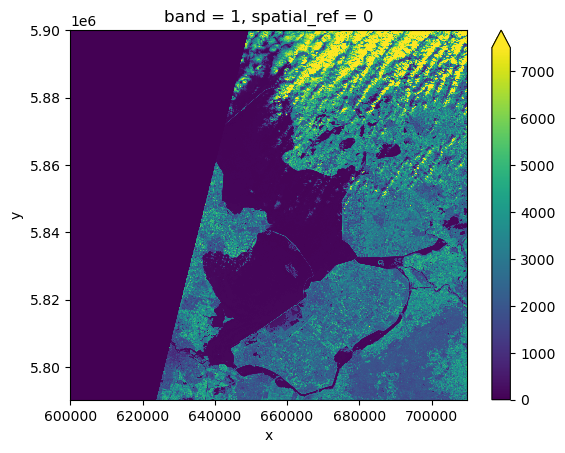

In [18]:
raster_ams_b9.plot(robust=True)

In [19]:
raster_ams_b9.rio.crs

CRS.from_epsg(32631)

In [22]:
epsg = raster_ams_b9.rio.crs.to_epsg()

In [21]:
import pyproj

In [23]:
crs = pyproj.CRS(epsg)

In [24]:
crs

<Derived Projected CRS: EPSG:32631>
Name: WGS 84 / UTM zone 31N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 0°E and 6°E, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Andorra. Belgium. Benin. Burkina Faso. Denmark - North Sea. France. Germany - North Sea. Ghana. Luxembourg. Mali. Netherlands. Niger. Nigeria. Norway. Spain. Togo. United Kingdom (UK) - North Sea.
- bounds: (0.0, 0.0, 6.0, 84.0)
Coordinate Operation:
- name: UTM zone 31N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [25]:
crs.area_of_use

AreaOfUse(west=0.0, south=0.0, east=6.0, north=84.0, name='Between 0°E and 6°E, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Andorra. Belgium. Benin. Burkina Faso. Denmark - North Sea. France. Germany - North Sea. Ghana. Luxembourg. Mali. Netherlands. Niger. Nigeria. Norway. Spain. Togo. United Kingdom (UK) - North Sea.')

#### Exercise: find the axes units of the CRS

What units are our data in? See if you can find a method to examine this information using `help(crs)` or `dir(crs)`

In [27]:
crs.axis_info

[Axis(name=Easting, abbrev=E, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Northing, abbrev=N, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [31]:
raster_ams_b9.min()

<xarray.DataArray ()>
array(0, dtype=uint16)
Coordinates:
    spatial_ref  int64 0

In [32]:
raster_ams_b9.max()

<xarray.DataArray ()>
array(15497, dtype=uint16)
Coordinates:
    spatial_ref  int64 0

In [33]:
raster_ams_b9.mean()

<xarray.DataArray ()>
array(1652.44009944)
Coordinates:
    spatial_ref  int64 0

In [34]:
raster_ams_b9.std()

<xarray.DataArray ()>
array(2049.16447495)
Coordinates:
    spatial_ref  int64 0

In [35]:
import numpy as np

In [36]:
np.min(raster_ams_b9)

<xarray.DataArray ()>
array(0, dtype=uint16)
Coordinates:
    spatial_ref  int64 0

In [37]:
href

'https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/31/U/FU/2020/3/S2A_31UFU_20200328_0_L2A/B09.tif'

In [38]:
raster_ams_b9_nodata = rioxarray.open_rasterio(href, masked=True)

In [40]:
raster_ams_b9_nodata.values

array([[[   nan,    nan,    nan, ...,  8888.,  9075.,  8139.],
        [   nan,    nan,    nan, ..., 10444., 10358.,  8669.],
        [   nan,    nan,    nan, ..., 10346., 10659.,  9168.],
        ...,
        [   nan,    nan,    nan, ...,  4295.,  4289.,  4320.],
        [   nan,    nan,    nan, ...,  4291.,  4269.,  4179.],
        [   nan,    nan,    nan, ...,  3944.,  3503.,  3862.]]],
      dtype=float32)

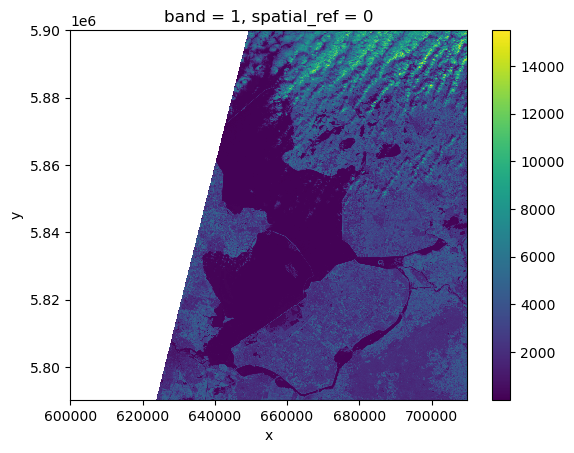

In [41]:
raster_ams_b9_nodata.plot()

In [42]:
raster_ams_b9_nodata.min()

<xarray.DataArray ()>
array(8., dtype=float32)
Coordinates:
    spatial_ref  int64 0

In [43]:
raster_ams_b9_nodata.mean()

<xarray.DataArray ()>
array(2477.405, dtype=float32)
Coordinates:
    spatial_ref  int64 0

In [50]:
overview_href = items[0].assets["overview"].get_absolute_href()

In [51]:
overview = rioxarray.open_rasterio(overview_href)

In [52]:
overview

<xarray.DataArray (band: 3, y: 343, x: 343)>
[352947 values with dtype=uint8]
Coordinates:
  * band         (band) int64 1 2 3
  * x            (x) float64 6.002e+05 6.005e+05 ... 7.093e+05 7.096e+05
  * y            (y) float64 5.9e+06 5.9e+06 5.899e+06 ... 5.791e+06 5.79e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

In [53]:
overview.shape

(3, 343, 343)

In [56]:
overview.values

array([[[  0,   0,   0, ..., 254, 255,   0],
        [  0,   0,   0, ..., 253, 255,   0],
        [  0,   0,   0, ..., 253, 255,   0],
        ...,
        [  0,   0,   0, ...,  35,  42,   2],
        [  0,   0,   0, ...,  47,  37,   5],
        [  0,   0,   0, ...,  11,  10,   9]],

       [[  0,   0,   0, ..., 253, 255,   0],
        [  0,   0,   0, ..., 252, 255,   0],
        [  0,   0,   0, ..., 252, 255,   0],
        ...,
        [  0,   0,   0, ...,  65,  60,   8],
        [  0,   0,   0, ...,  61,  45,   7],
        [  0,   0,   0, ...,   9,   8,   7]],

       [[  0,   0,   0, ..., 254, 255,   0],
        [  0,   0,   0, ..., 253, 255,   0],
        [  0,   0,   0, ..., 253, 255,   0],
        ...,
        [  0,   0,   0, ...,  49,  44,   0],
        [  0,   0,   0, ...,  45,  29,   0],
        [  0,   0,   0, ...,   0,   0,   0]]], dtype=uint8)

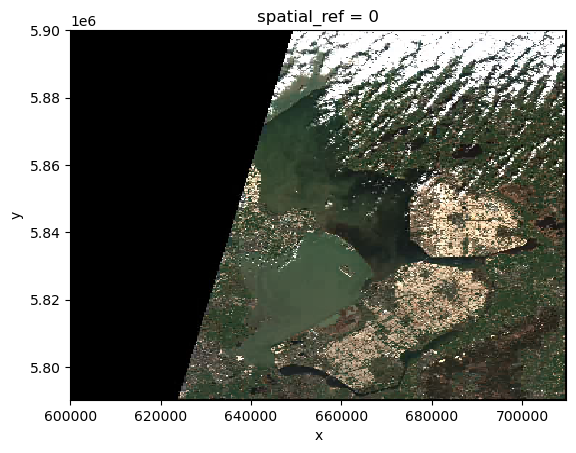

In [55]:
overview.plot.imshow()

#### Exercise: set the plotting aspect ratio

Plotting a satellite image can lead to a "stretched" image. Let’s visualize it with the right aspect ratio. You can use the [documentation](https://xarray.pydata.org/en/stable/generated/xarray.DataArray.plot.imshow.html) of `DataArray.plot.imshow()`.

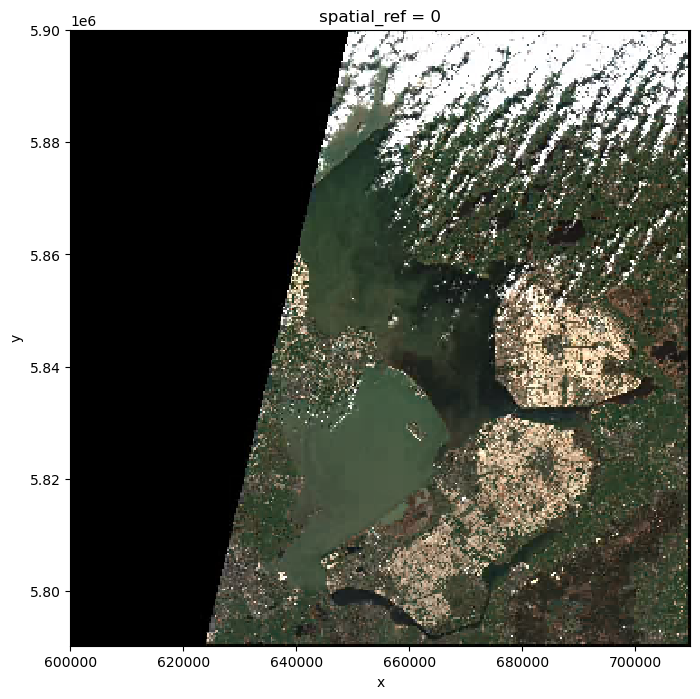

In [66]:
overview.plot.imshow(aspect=1, size=8)